In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10607 sha256=cb7f48df71eb37b59c9e677a7f512efc892a5484c846c39d8779d83cbb8a45ba
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pylab import bone, pcolor, colorbar, plot, show

In [3]:
df = pd.read_csv('/kaggle/input/credit-card-applications/Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.T

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
Data Type,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64
Column Real Name,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,690,2,350,215,3,14,8,132,2,2,23,2,3,171,240,2
Duplicate Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Min,15565714.0,0.0,13.75,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Max,15815443.0,1.0,80.25,28.0,3.0,14.0,9.0,28.5,1.0,1.0,67.0,1.0,3.0,2000.0,100001.0,1.0


In [5]:
X = df.drop(columns={"Class"},axis=1)
y =df["Class"]
label_names = {0:'Not Approved  ', 1:'Approved '}
type(y)

pandas.core.series.Series

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc =minMaxScaler = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X = sc.transform(X)
type(X)

numpy.ndarray

In [7]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5,random_seed=43)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

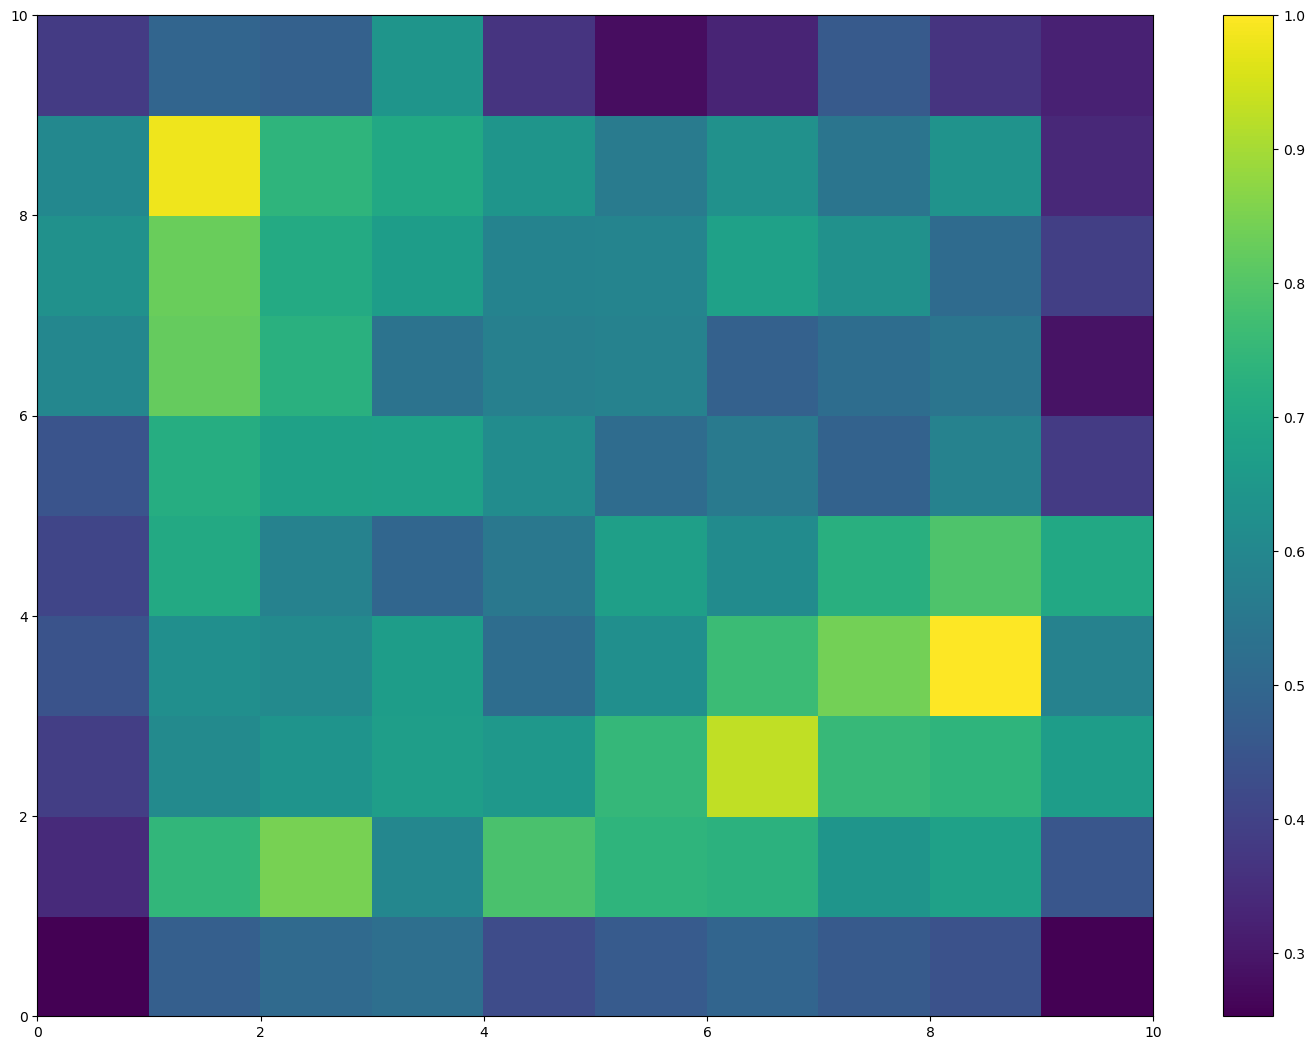

In [8]:
plt.figure(figsize=(18, 13)) # To make the fig bigger 

pcolor(som.distance_map().T) # This line finds out the mean inter neuron distance and makes a map based on these distances.
                             # It makes clusters based on the colours based on the distances. The darker the colour the closer the neurons is to it's neighbourhood.
                             # The lighter neurons are the outliers and if customers are present in it that means they are fradulent.
colorbar()

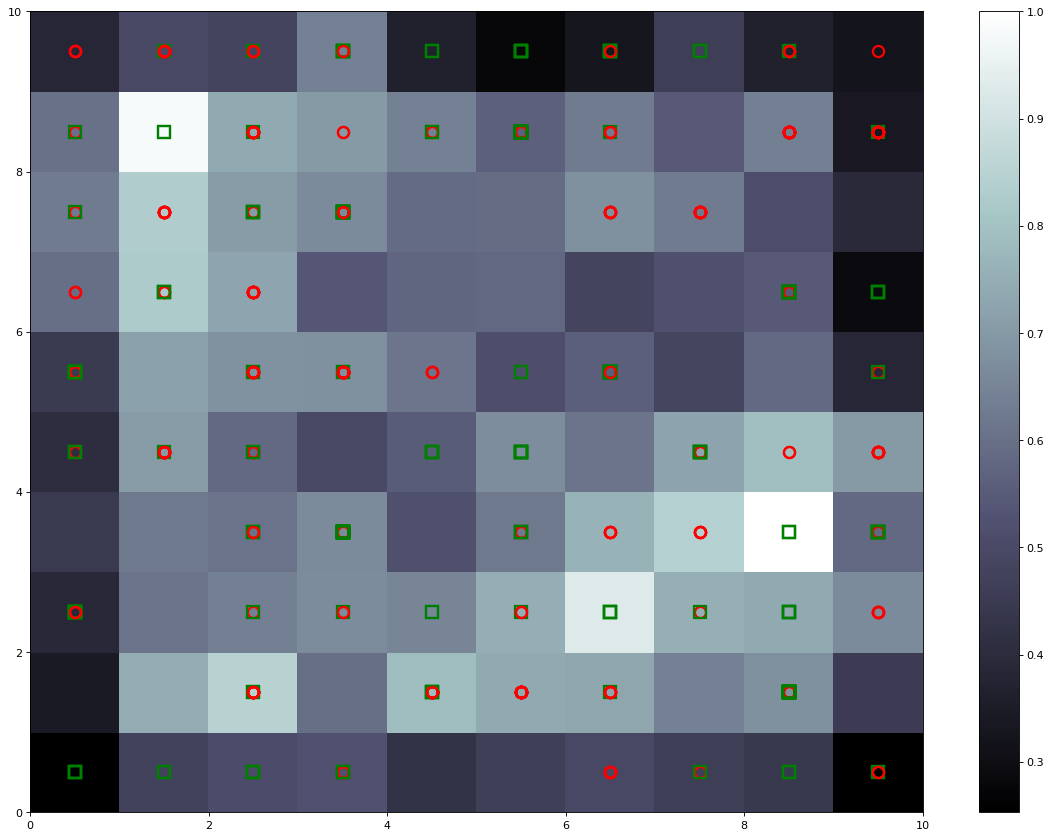

In [9]:
plt.figure(figsize=(18, 13), dpi= 80, facecolor='w', edgecolor='k') # To make the fig bigger 

bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # w[0], w[1] will place the marker at bottom left corner of the rectangle. 
    #Let us add 0.5 to both of these to plot the market at the center of the rectange.
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()

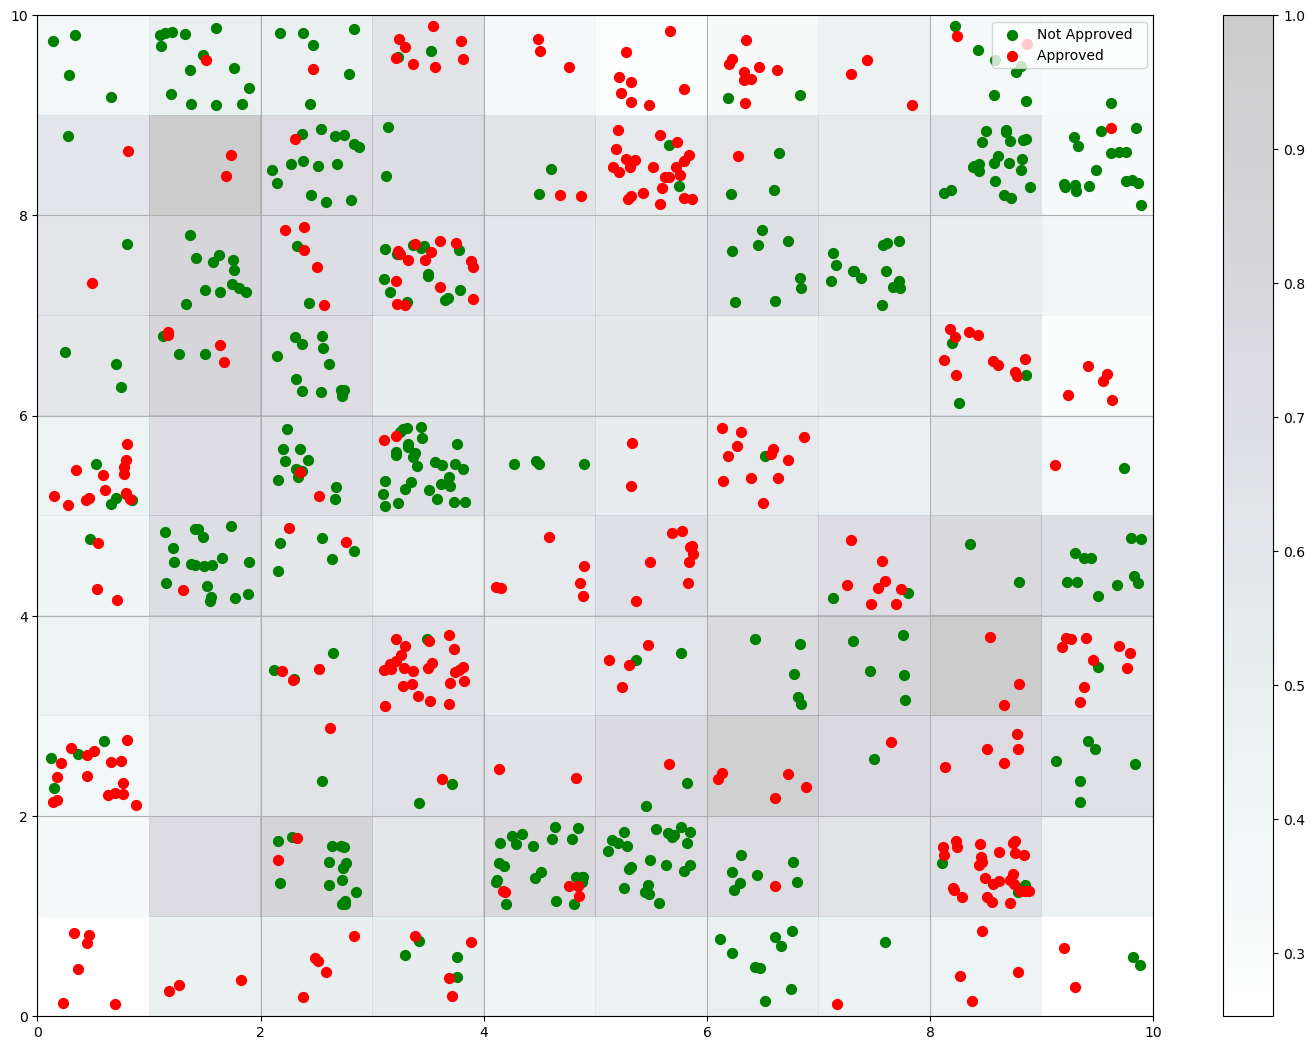

In [10]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(18, 13))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y):
    idx_target = y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [11]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(1, 4), (3, 5), (1, 7), (0, 2), (5, 8), (5, 4), (6, 0), (3, 3), (8, 8), (6, 5), (8, 6), (6, 1), (2, 5), (8, 1), (3, 0), (2, 4), (4, 1), (3, 2), (7, 7), (5, 1), (3, 7), (0, 0), (0, 5), (2, 8), (9, 2), (9, 8), (2, 1), (9, 6), (4, 5), (4, 4), (5, 9), (1, 9), (6, 8), (9, 3), (1, 0), (7, 3), (3, 9), (6, 9), (6, 7), (2, 9), (0, 9), (2, 6), (1, 6), (6, 2), (5, 5), (2, 0), (7, 2), (9, 4), (8, 2), (2, 3), (3, 8), (8, 3), (8, 9), (2, 7), (0, 4), (5, 3), (7, 0), (2, 2), (9, 5), (7, 4), (0, 8), (4, 2), (4, 8), (8, 0), (7, 9), (9, 0), (0, 6), (0, 7), (1, 8), (4, 9), (8, 4), (5, 2), (9, 9), (6, 3)])

In [12]:
# from fig squares (7,5) seem like potential fraudulent customers - white color - maximum mean interneuron distance
frauds = np.concatenate((mappings[(2,9)],mappings[(9,4)]),axis=0)
np.asarray(frauds).shape

(18, 15)

In [13]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

(18, 15)

In [14]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))
print ("Fraud Customer Count is :",len(frauds[:,0]))

Fraud Customer IDs
15636767
15713983
15648681
15763194
15666012
15740411
15790689
15651868
15716082
15651460
15672637
15752344
15736533
15779207
15611409
15609987
15636454
15615296
Fraud Customer Count is : 18
